In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('train_data.csv', sep=';')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_colaborador        2152 non-null   int64  
 1   id_ultimo_jefe        2061 non-null   float64
 2   seniority             2152 non-null   int64  
 3   modalidad_trabajo     2152 non-null   object 
 4   distancia_oficina     2152 non-null   float64
 5   dias_baja_salud       2152 non-null   int64  
 6   genero                2152 non-null   object 
 7   canal_reclutamiento   2152 non-null   object 
 8   permanencia_promedio  2152 non-null   int64  
 9   fecha_nacimiento      2152 non-null   object 
 10  salario               2152 non-null   int64  
 11  performance_score     2084 non-null   float64
 12  psi_score             2152 non-null   int64  
 13  fecha_incorporacion   2152 non-null   object 
 14  estado_civil          2152 non-null   object 
 15  abandono_6meses      

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,102074.0,1,Híbrida,1.760,1,Mujer,Ferias & Networking,1,25/11/1999,140011,99.0,75,25/01/2018,Soltero,0
1,103355,102115.0,1,Híbrida,0.760,2,Hombre,Ferias & Networking,2,16/10/1996,182774,99.0,81,24/07/2021,Soltero,1
2,100669,102060.0,1,Híbrida,4.950,3,Mujer,Referidos,11,29/01/1971,682106,96.0,74,13/07/2016,Viudo,0
3,103760,102062.0,1,Híbrida,13.030,2,Hombre,Linkedin,2,28/04/1992,270232,96.0,82,21/07/2014,Soltero,1
4,100965,102062.0,1,Híbrida,13.045,2,Hombre,Linkedin,2,3/05/1992,266804,95.0,82,22/07/2014,Soltero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,103567,102171.0,1,Presencial,1.965,8,Mujer,Portal Web,3,20/12/1976,281159,NaN,65,22/12/2023,Casado,1
2148,104098,102172.0,1,Presencial,0.805,12,Mujer,Linkedin,13,23/10/1976,460337,NaN,82,26/07/2023,Casado,1
2149,103987,102155.0,1,Presencial,1.625,1,Hombre,Portal Web,11,19/03/1972,633879,NaN,66,24/07/2023,Soltero,1
2150,103810,102141.0,1,Presencial,5.665,2,Hombre,Portal Web,6,7/04/1971,793977,NaN,80,31/08/2023,Casado,1


# Manejo de datos faltantes
Las columnas que tienen algún dato faltante son: id_ultimo_jefe y performance_score, eliminaremos la columna id_ultimo_jefe ya que no aporta información relevante para el modelo y haremos imputación de la columna performance_score con cardinalidad.

In [22]:
df_data = df.drop(columns=['id_ultimo_jefe'])

In [23]:
cat_cols = df_data.select_dtypes(include=[object, "category"]).columns
print(cat_cols)

Index(['modalidad_trabajo', 'genero', 'canal_reclutamiento',
       'fecha_nacimiento', 'fecha_incorporacion', 'estado_civil'],
      dtype='object')


In [24]:
encoder = OrdinalEncoder()
categorical_transformer = make_column_transformer((encoder, cat_cols),
                        remainder='passthrough')

In [27]:
df_encoded = categorical_transformer.fit_transform(df_data)
encoded_cols = categorical_transformer.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns = encoded_cols)
df_encoded.columns = df_encoded.columns.str.replace('ordinalencoder__', '')
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '')
df_encoded

,modalidad_trabajo,genero,canal_reclutamiento,fecha_nacimiento,fecha_incorporacion,estado_civil,id_colaborador,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses
0,0.0,1.0,0.0,1184.0,905.0,2.0,100247.0,1.0,1.760,1.0,1.0,140011.0,99.0,75.0,0.0
1,0.0,0.0,0.0,514.0,876.0,2.0,103355.0,1.0,0.760,2.0,2.0,182774.0,99.0,81.0,1.0
2,0.0,1.0,4.0,1372.0,242.0,3.0,100669.0,1.0,4.950,3.0,11.0,682106.0,96.0,74.0,0.0
3,0.0,0.0,2.0,1330.0,721.0,2.0,103760.0,1.0,13.030,2.0,2.0,270232.0,96.0,82.0,1.0
4,0.0,0.0,2.0,1451.0,778.0,2.0,100965.0,1.0,13.045,2.0,2.0,266804.0,95.0,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,3.0,878.0,802.0,0.0,103567.0,1.0,1.965,8.0,3.0,281159.0,NaN,65.0,1.0
2148,1.0,1.0,2.0,1046.0,989.0,0.0,104098.0,1.0,0.805,12.0,13.0,460337.0,NaN,82.0,1.0
2149,1.0,0.0,3.0,693.0,878.0,2.0,103987.0,1.0,1.625,1.0,11.0,633879.0,NaN,66.0,1.0
2150,1.0,0.0,3.0,1804.0,1283.0,0.0,103810.0,1.0,5.665,2.0,6.0,793977.0,NaN,80.0,1.0


# Imputación basada en modelos 

In [37]:
# Crear una nueva columna que indique si los datos originales estaban ausentes
df_encoded['performance_score_missing'] = df_encoded['performance_score'].isna()

# Llenar los valores faltantes en la columna 'performance_score'
df_encoded['performance_score'] = df_encoded['performance_score'].sort_values().ffill()

# Crear una nueva columna 'performance_score_imputed' que es True cuando 'performance_score' estaba ausente y False de lo contrario
df_encoded['performance_score_imputed'] = df_encoded['performance_score_missing'].map({True: 'True', False: 'False'})

# Eliminar la columna 'performance_score_missing'
df_encoded = df_encoded.drop(columns=['performance_score_missing'])

df_encoded

,modalidad_trabajo,genero,canal_reclutamiento,fecha_nacimiento,fecha_incorporacion,estado_civil,id_colaborador,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,performance_score_imputed
0,0.0,1.0,0.0,1184.0,905.0,2.0,100247.0,1.0,1.760,1.0,1.0,140011.0,99.0,75.0,0.0,False
1,0.0,0.0,0.0,514.0,876.0,2.0,103355.0,1.0,0.760,2.0,2.0,182774.0,99.0,81.0,1.0,False
2,0.0,1.0,4.0,1372.0,242.0,3.0,100669.0,1.0,4.950,3.0,11.0,682106.0,96.0,74.0,0.0,False
3,0.0,0.0,2.0,1330.0,721.0,2.0,103760.0,1.0,13.030,2.0,2.0,270232.0,96.0,82.0,1.0,False
4,0.0,0.0,2.0,1451.0,778.0,2.0,100965.0,1.0,13.045,2.0,2.0,266804.0,95.0,82.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,3.0,878.0,802.0,0.0,103567.0,1.0,1.965,8.0,3.0,281159.0,99.0,65.0,1.0,True
2148,1.0,1.0,2.0,1046.0,989.0,0.0,104098.0,1.0,0.805,12.0,13.0,460337.0,99.0,82.0,1.0,True
2149,1.0,0.0,3.0,693.0,878.0,2.0,103987.0,1.0,1.625,1.0,11.0,633879.0,99.0,66.0,1.0,True
2150,1.0,0.0,3.0,1804.0,1283.0,0.0,103810.0,1.0,5.665,2.0,6.0,793977.0,99.0,80.0,1.0,True


In [42]:
df_to_impute = df_encoded.drop(columns=['performance_score_imputed'])

In [51]:
# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Ajustar el imputer a los datos y transformar los datos
df_imputed = imputer.fit_transform(df_to_impute)

# Convertir el resultado a un DataFrame de pandas y asignar los nombres de las columnas
df_imputed = pd.DataFrame(df_imputed, columns=df_to_impute.columns)

In [59]:
df_data = pd.concat([df_imputed, df_encoded['performance_score_imputed']], axis=1)

# Regresiones Robustas - RANSAC, Huber Regressor

In [60]:
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [85]:
y = df_data['abandono_6meses']

## Realizar un escalamiento de los datos

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_data.drop(columns=['performance_score_imputed', 'abandono_6meses', 'id_colaborador'])
X = scaler.fit_transform(X)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
estimadores = {
    'RANSAC': RANSACRegressor(),
    'Huber': HuberRegressor(epsilon=1.35),
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1)
}

for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predicciones = estimador.predict(X_test)
    mse = mean_squared_error(y_test, predicciones)
    print("="*32)
    print(f'{name}: {mse}')

C:\Users\gabca\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\gabca\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\gabca\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\gabca\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\gabca\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RANSAC: 0.5027236424368611
Huber: 0.2216155367903144
SVR: 0.2370095383534482


# Método de Bagging

In [89]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [90]:
knn_class = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, knn_pred)}')

Accuracy: 0.6078886310904872


In [91]:
bag_class = BaggingRegressor(KNeighborsClassifier(), n_estimators=10, random_state=42).fit(X_train, y_train)
print(f'Accuracy: {bag_class.score(X_test, y_test)}')

Accuracy: -0.14344855063100304


# PCA

In [92]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [93]:
print(X_train.shape)

(1721, 14)


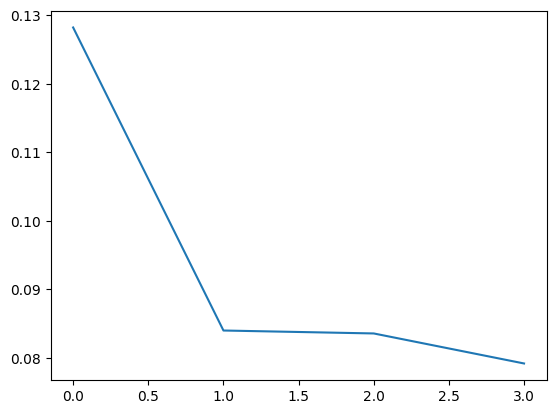

In [94]:
pca = PCA(n_components=4)
pca.fit(X_train)

plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [95]:
logistic = LogisticRegression(solver='lbfgs')

data_train = pca.transform(X_train)
data_test = pca.transform(X_test)

logistic.fit(data_train, y_train)
print(f'Accuracy: {logistic.score(data_test, y_test)}')



Accuracy: 0.5661252900232019


## Otros intentos

In [96]:
from sklearn.pipeline import make_pipeline

# Crear una instancia de PCA y RANSACRegressor
pca = PCA(n_components=4)
ransac = RANSACRegressor()

# Crear un pipeline que primero aplica PCA y luego RANSACRegressor
model = make_pipeline(pca, ransac)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
print(f'Accuracy: {model.score(X_test, y_test)}')

Accuracy: -1.0234741784037555


In [97]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')

# Crear un pipeline que primero aplica PCA y luego SVR
model = make_pipeline(pca, svm)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
print(f'Accuracy: {model.score(X_test, y_test)}')

Accuracy: -0.12710244250452796


# Selección de mejores características:

In [111]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_data.drop(columns=['performance_score_imputed', 'abandono_6meses', 'id_colaborador'])
X = scaler.fit_transform(X)

# Crear una instancia de SelectKBest
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Obtener la máscara de las características seleccionadas
mask = selector.get_support()

# Get the columns used for SelectKBest
used_columns = df_data.drop(columns=['performance_score_imputed', 'abandono_6meses', 'id_colaborador']).columns

# Apply the mask to these columns
selected_features = used_columns[mask]

print("Características seleccionadas:")
for feature in selected_features:
    print(feature)

Características seleccionadas:
modalidad_trabajo
seniority
dias_baja_salud
salario
performance_score


In [112]:
X_new.shape

(2152, 5)

In [118]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

<class 'numpy.ndarray'>


In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the models and hyperparameters
models = [
    {
        'name': 'LinearRegression',
        'model': LinearRegression(),
        'params': {}
    },
    {
        'name': 'RANSACRegressor',
        'model': RANSACRegressor(),
        'params': {}
    },
    {
        'name': 'HuberRegressor',
        'model': HuberRegressor(),
        'params': {'HuberRegressor__epsilon': [1.0, 1.35, 1.5]}
    },
    {
        'name': 'SVR',
        'model': SVR(),
        'params': {'SVR__kernel': ['linear', 'rbf'], 'SVR__C': [0.1, 1, 10], 'SVR__epsilon': [0.1, 0.2, 0.3]}
    }
]
models.extend([
    {
        'name': 'DecisionTreeRegressor',
        'model': DecisionTreeRegressor(),
        'params': {'DecisionTreeRegressor__max_depth': [None, 5, 10]}
    },
    {
        'name': 'RandomForestRegressor',
        'model': RandomForestRegressor(),
        'params': {'RandomForestRegressor__n_estimators': [10, 50, 100]}
    },
    {
        'name': 'GradientBoostingRegressor',
        'model': GradientBoostingRegressor(),
        'params': {'GradientBoostingRegressor__n_estimators': [100, 200], 'GradientBoostingRegressor__learning_rate': [0.1, 0.05, 0.01]}
    },
    {
        'name': 'Lasso',
        'model': Lasso(),
        'params': {'Lasso__alpha': [0.1, 1.0, 10.0]}
    },
    {
        'name': 'Ridge',
        'model': Ridge(),
        'params': {'Ridge__alpha': [0.1, 1.0, 10.0]}
    },
    {
        'name': 'BaggingRegressor',
        'model': BaggingRegressor(),
        'params': {'BaggingRegressor__n_estimators': [10, 50, 100]}
    },
    {
        'name': 'AdaBoostRegressor',
        'model': AdaBoostRegressor(),
        'params': {'AdaBoostRegressor__n_estimators': [50, 100, 200], 'AdaBoostRegressor__learning_rate': [0.1, 0.05, 0.01]}
    },
    {
        'name': 'StackingRegressor',
        'model': StackingRegressor(estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('svr', SVR())]),
        'params': {}
    }
])

best_models = []
best_scores = []

# For each model
for m in models:
    # Create a pipeline
    pipe = Pipeline(steps=[('pca', PCA(n_components=4)), (m['name'], m['model'])])

    # Create a GridSearchCV object
    search = GridSearchCV(pipe, m['params'], n_jobs=-1)

    # Fit the GridSearchCV object to the data
    search.fit(X_train_new, y_train_new)

    # Print the best score and the best parameters
    print(f"Best score for {m['name']}: {search.best_score_}")
    print(f"Best parameters for {m['name']}: {search.best_params_}")

    # Append the best score and the best model to the lists
    best_scores.append(search.best_score_)
    best_models.append(search.best_estimator_)

# Select the model with the highest score
best_index = np.argmax(best_scores)
best_model = best_models[best_index]

print(f"The best model is {models[best_index]['name']} with a score of {best_scores[best_index]}")

Best score for LinearRegression: 0.09947018690521318
Best parameters for LinearRegression: {}
Best score for RANSACRegressor: -0.8578793804669449
Best parameters for RANSACRegressor: {}
Best score for HuberRegressor: 0.09833322235050301
Best parameters for HuberRegressor: {'HuberRegressor__epsilon': 1.5}


C:\Users\gabca\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Best score for SVR: 0.11577284396087568
Best parameters for SVR: {'SVR__C': 1, 'SVR__epsilon': 0.3, 'SVR__kernel': 'rbf'}
Best score for DecisionTreeRegressor: 0.05493178502130238
Best parameters for DecisionTreeRegressor: {'DecisionTreeRegressor__max_depth': 5}
Best score for RandomForestRegressor: 0.009571671362115609
Best parameters for RandomForestRegressor: {'RandomForestRegressor__n_estimators': 100}
Best score for GradientBoostingRegressor: 0.11869912961129707
Best parameters for GradientBoostingRegressor: {'GradientBoostingRegressor__learning_rate': 0.05, 'GradientBoostingRegressor__n_estimators': 100}
Best score for Lasso: 0.019249898920172103
Best parameters for Lasso: {'Lasso__alpha': 0.1}
Best score for Ridge: 0.09951710511457863
Best parameters for Ridge: {'Ridge__alpha': 10.0}
Best score for BaggingRegressor: 0.007291067583389155
Best parameters for BaggingRegressor: {'BaggingRegressor__n_estimators': 100}
Best score for AdaBoostRegressor: 0.08998756541457054
Best paramet

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

data = pd.read_csv('train_data.csv', sep=';')

# Transformación de las fechas a edad y tiempo en la organización
data['fecha_nacimiento'] = pd.to_datetime(data['fecha_nacimiento'], dayfirst=True)
data['fecha_incorporacion'] = pd.to_datetime(data['fecha_incorporacion'], dayfirst=True)
current_date = datetime.now()
data['Edad'] = data['fecha_nacimiento'].apply(lambda x: (current_date - x).days // 365)
data['Tiempo en la organización'] = data['fecha_incorporacion'].apply(lambda x: (current_date - x).days // 365)

# Imputación de valores faltantes en 'performance_score'
imputer = SimpleImputer(strategy='median')
data['performance_score'] = imputer.fit_transform(data[['performance_score']])

# Eliminación de columnas no necesarias
data.drop(['id_ultimo_jefe', 'fecha_nacimiento', 'fecha_incorporacion', 'id_colaborador'], axis=1, inplace=True)

# Codificación de variables categóricas
label_encoder = LabelEncoder()
categorical_columns = ['modalidad_trabajo', 'genero', 'canal_reclutamiento', 'estado_civil']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separación de la variable objetivo y características
X = data.drop('abandono_6meses', axis=1)
y = data['abandono_6meses']

# Normalización de las variables numéricas
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definición del modelo de Gradient Boosting y espacio de hiperparámetros para GridSearchCV
gb_model = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Configuración y ejecución de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados de la optimización
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Mejores hiperparámetros:", best_params)
print("Mejor puntuación de precisión:", best_score)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Mejor puntuación de precisión: 0.6646806450903171


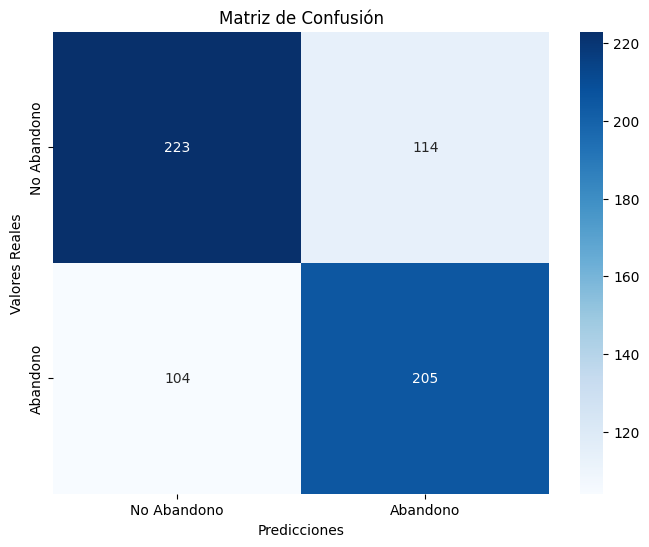

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Hacemos predicciones con el mejor modelo sobre el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

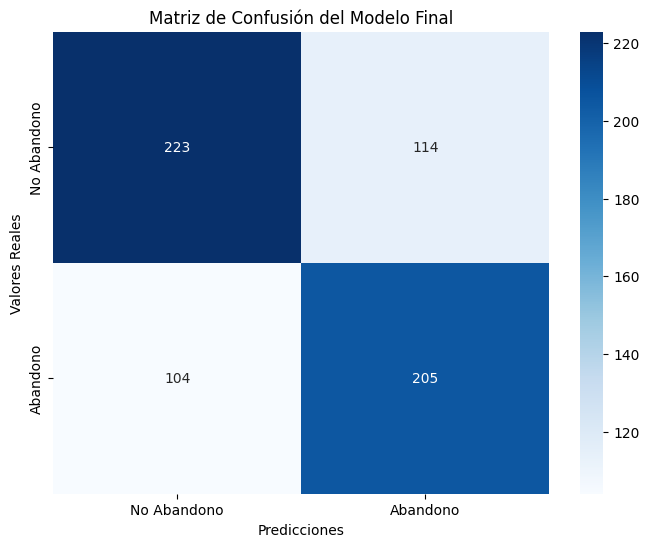

Precisión del modelo en el conjunto de prueba: 0.6625386996904025


In [126]:
# Entrenamiento del modelo con los mejores hiperparámetros
final_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=50, random_state=42)
final_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_final = final_model.predict(X_test)

# Evaluación del modelo: Matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_final = confusion_matrix(y_test, y_pred_final)
accuracy_final = accuracy_score(y_test, y_pred_final)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión del Modelo Final')
plt.show()

# Imprimir la precisión del modelo
print("Precisión del modelo en el conjunto de prueba:", accuracy_final)

In [129]:
data_test = pd.read_csv('test_data.csv', sep=';')

# Transformación de las fechas a edad y tiempo en la organización
data_test['fecha_nacimiento'] = pd.to_datetime(data_test['fecha_nacimiento'], dayfirst=True)
data_test['fecha_incorporacion'] = pd.to_datetime(data_test['fecha_incorporacion'], dayfirst=True)
data_test['Edad'] = data_test['fecha_nacimiento'].apply(lambda x: (datetime.now() - x).days // 365)
data_test['Tiempo en la organización'] = data_test['fecha_incorporacion'].apply(lambda x: (datetime.now() - x).days // 365)

# Imputación de valores faltantes para 'performance_score'
# Asegúrate de ajustar esto si hay otras columnas con valores faltantes en tu conjunto de prueba
imputer = SimpleImputer(strategy='median')
data_test['performance_score'] = imputer.fit_transform(data_test[['performance_score']])

# Eliminación de columnas no necesarias
data_test.drop(['id_ultimo_jefe', 'fecha_nacimiento', 'fecha_incorporacion', 'id_colaborador'], axis=1, inplace=True)

# Codificación de variables categóricas
label_encoder = LabelEncoder()
categorical_columns = ['modalidad_trabajo', 'genero', 'canal_reclutamiento', 'estado_civil']
for column in categorical_columns:
    data_test[column] = label_encoder.fit_transform(data_test[column])

# Normalización de las variables numéricas
scaler = StandardScaler()
X_test_new = pd.DataFrame(scaler.fit_transform(data_test), columns=data_test.columns)

# Preparación completa, listo para hacer predicciones
# Asume que 'final_model' es tu modelo entrenado con los mejores hiperparámetros
y_pred_test_new = final_model.predict(X_test_new)

In [130]:
print(y_pred_test_new)

[0 0 0 ... 1 0 1]


In [132]:
id_column = pd.read_csv('test_data.csv', sep=';')['id_colaborador']

results_df = pd.DataFrame({
    'ID': id_column,
    'abandono_6meses': y_pred_test_new
})

# Guarda el DataFrame como un nuevo archivo CSV
output_file_path = 'predicciones_abandono.csv'  # Ajusta el nombre del archivo según necesites
results_df.to_csv(output_file_path, index=False)

print(f"Archivo guardado: {output_file_path}")

Archivo guardado: predicciones_abandono.csv
